### Esse notebook tem como intuito responder a seguinte pergunta:
### Qual foi a tendência da qualidade do ar nos últimos anos no Rio de Janeiro?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Qualidade_do_ar_-_Dados_horA1rios.csv')

In [3]:
df.sort_values('Data')  # data range: 2011/01/01 00:30 - 2021/03/31 23:30

,Data,CodNum,Estação,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO,NOx,O3,PM10,PM2_5,Lat,Lon,X_UTM_Sirgas2000,Y_UTM_Sirgas2000,OBJECTID
326721,2011/01/01 00:30:00+00,7,SC,0.0,1009.60,2.87,26.66,90.73,180.00,0.47,...,NaN,NaN,8.47,8.00,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,326722
387058,2011/01/01 00:30:00+00,8,SP,0.0,1007.45,6.40,20.91,89.49,176.83,2.92,...,NaN,NaN,5.08,44.05,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,387059
103079,2011/01/01 00:30:00+00,3,CA,0.2,1009.33,1.57,21.81,84.50,250.67,0.34,...,NaN,NaN,17.89,10.00,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06,103080
163229,2011/01/01 00:30:00+00,1,AV,0.0,1009.52,0.70,24.09,79.79,157.00,0.90,...,NaN,NaN,3.68,34.64,NaN,-22.965004,-43.180482,686537.0128,7.459198e+06,163230
387059,2011/01/01 01:30:00+00,8,SP,0.0,1006.57,6.50,20.53,92.83,211.17,2.82,...,NaN,NaN,11.90,55.89,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,387060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661660,2021/03/31 22:30:00+00,8,SP,1.2,1008.85,0.00,20.80,74.52,292.00,0.60,...,2.46,9.19,29.33,28.97,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,661663
655125,2021/03/31 23:30:00+00,7,SC,3.4,1009.57,0.00,24.52,79.97,111.83,1.03,...,NaN,NaN,28.27,23.00,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,655128
642176,2021/03/31 23:30:00+00,5,IR,0.2,1010.15,7.00,23.40,97.57,308.17,1.23,...,4.29,37.53,12.21,43.00,20.0,-22.831621,-43.326845,671696.6238,7.474147e+06,642179
648598,2021/03/31 23:30:00+00,6,PG,0.2,1010.98,1.00,NaN,96.87,NaN,NaN,...,NaN,NaN,45.56,19.00,NaN,-23.004379,-43.629010,640505.9556,7.455338e+06,648601


### Filtrando dados do período janeiro-março de 2015

In [4]:

df_2015 = df.loc[(df['Data'].str.contains('2015/01')) | (df['Data'].str.contains('2015/02')) | (df['Data'].str.contains('2015/03'))]
df_2015

,Data,CodNum,Estação,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO,NOx,O3,PM10,PM2_5,Lat,Lon,X_UTM_Sirgas2000,Y_UTM_Sirgas2000,OBJECTID
25706,2015/01/01 00:30:00+00,2,BG,0.0,1005.95,1.17,27.32,56.48,272.50,3.50,...,2.00,16.29,43.54,106.00,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25707
25707,2015/01/01 01:30:00+00,2,BG,0.0,1005.23,0.67,27.28,54.53,277.67,2.23,...,1.47,15.88,47.87,31.00,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25708
25708,2015/01/01 02:30:00+00,2,BG,0.0,1005.35,1.00,26.68,58.13,263.83,2.92,...,1.87,14.89,47.74,33.00,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25709
25709,2015/01/01 03:30:00+00,2,BG,0.0,1005.25,1.00,27.32,54.17,258.00,3.52,...,NaN,NaN,50.85,28.00,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25710
25710,2015/01/01 04:30:00+00,2,BG,0.0,1005.65,0.83,28.08,49.92,255.17,2.97,...,NaN,NaN,57.11,10.00,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423672,2015/03/31 19:30:00+00,8,SP,0.0,1010.75,1.00,26.25,61.33,172.83,0.95,...,37.78,43.17,33.58,24.35,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,423673
423673,2015/03/31 20:30:00+00,8,SP,0.2,1011.58,0.83,24.33,70.33,190.67,0.90,...,32.56,39.09,21.85,26.57,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,423674
423674,2015/03/31 21:30:00+00,8,SP,0.0,1012.42,1.00,23.68,73.47,158.50,0.43,...,27.37,35.26,13.48,27.13,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,423675
423675,2015/03/31 22:30:00+00,8,SP,0.0,1012.28,1.00,24.03,67.77,181.83,0.65,...,26.40,32.63,10.93,19.69,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,423676


In [19]:
df_sp = df_2015.loc[df_2015['Estação'] == 'SP']
df_co_sp = df_sp[['Data','CO']].dropna()

df_co_sp

,Data,CO
421517,2015/01/01 00:30:00+00,0.56
421518,2015/01/01 01:30:00+00,0.57
421519,2015/01/01 02:30:00+00,0.56
421520,2015/01/01 03:30:00+00,0.51
421521,2015/01/01 04:30:00+00,0.44
...,...,...
423672,2015/03/31 19:30:00+00,0.46
423673,2015/03/31 20:30:00+00,0.47
423674,2015/03/31 21:30:00+00,0.38
423675,2015/03/31 22:30:00+00,0.36


### Construindo gráfico

Text(0.5, 1.0, 'CO - jan-mar 2015')

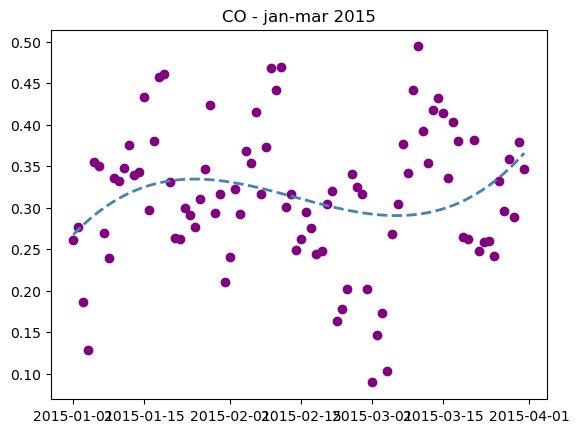

In [17]:
df_co_bg['CO'] = df_co_bg['CO'].apply(pd.to_numeric, errors='coerce')
df_co_bg['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_bg_dia = df_co_bg.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_bg_dia['Data'] = df_co_bg_dia.index

x = np.linspace(0,1, len(df_co_bg_dia['Data']))
y = np.array(df_co_bg_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_bg_dia['Data'], df_co_bg_dia['CO'], color='purple')
plt.plot(df_co_bg_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2015")